# Problem 1: Data visualization

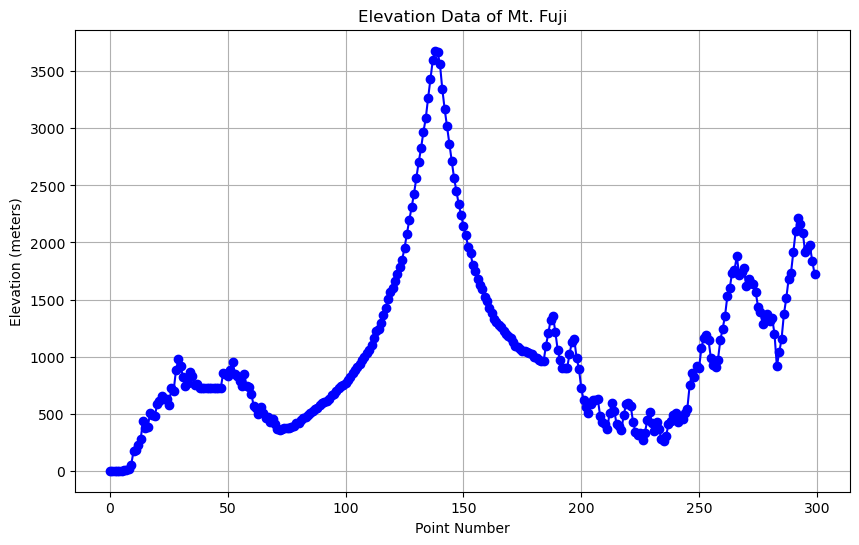

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Load Fuji data
csv_path = "./mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Problem 1: Data visualization
def visualize_elevation(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data[:, 0], data[:, 3], marker='o', linestyle='-', color='b')
    plt.title('Elevation Data of Mt. Fuji')
    plt.xlabel('Point Number')
    plt.ylabel('Elevation (meters)')
    plt.grid(True)
    plt.show()

# Visualize Fuji data
visualize_elevation(fuji)


[Problem 2]

In [10]:
def calculate_gradient(current_point, data):
    """
    Calculate the gradient at a certain point based on the elevation data.

    Parameters:
    - current_point (int): The current point number.
    - data (ndarray): Elevation data.

    Returns:
    - gradient (float): The gradient at the current point.
    """
    # Check if the current point is not at the beginning
    if current_point > 0:
        # Calculate the gradient using the formula
        elevation_diff = data[current_point, 3] - data[current_point - 1, 3]
        distance_diff = data[current_point, 4] - data[current_point - 1, 4]
        gradient = elevation_diff / distance_diff
        return gradient
    else:
        # If at the beginning, return 0 as there is no previous point
        return 0.0


[Problem 3] 

In [11]:
def calculate_destination(current_point, gradient, alpha):
    """
    Calculate the destination point based on the current point, gradient, and learning rate (alpha).

    Parameters:
    - current_point (int): The current point for which to calculate the destination.
    - gradient (float): The gradient at the current point.
    - alpha (float): The learning rate, a hyperparameter greater than 0.

    Returns:
    - destination_point (int): The next point rounded based on the calculated destination.
    """

    # Calculate the destination point
    destination = current_point - alpha * gradient

    # Round to the nearest integer
    destination_point = int(round(destination))

    # Ensure the destination point is within the valid range
    destination_point = max(1, min(destination_point, len(fuji) - 1))

    return destination_point


In [14]:
def descend_from_point(start_point, alpha=0.2):
    """
    Descend from the given start point using the gradient descent method.

    Parameters:
    - start_point (int): The starting point to descend from.
    - alpha (float): The learning rate, a hyperparameter greater than 0. Default is 0.2.

    Returns:
    - descent_points (list): List of points recorded for each move during descent.
    """

    # Initialize the list to store descent points
    descent_points = [start_point]

    # Iterate until the descent stops (when the destination point is the same as the current point)
    while True:
        # Get the elevation and gradient at the current point
        current_elevation = fuji[start_point, 3]
        current_gradient = calculate_gradient(start_point, fuji)

        # Calculate the destination point based on the current point and gradient
        destination_point = calculate_destination(start_point, current_gradient, alpha)

        # Check if the destination point is the same as the current point
        if destination_point == start_point:
            break

        # Append the destination point to the list of descent points
        descent_points.append(destination_point)

        # Update the current point to the destination point
        start_point = destination_point

    return descent_points


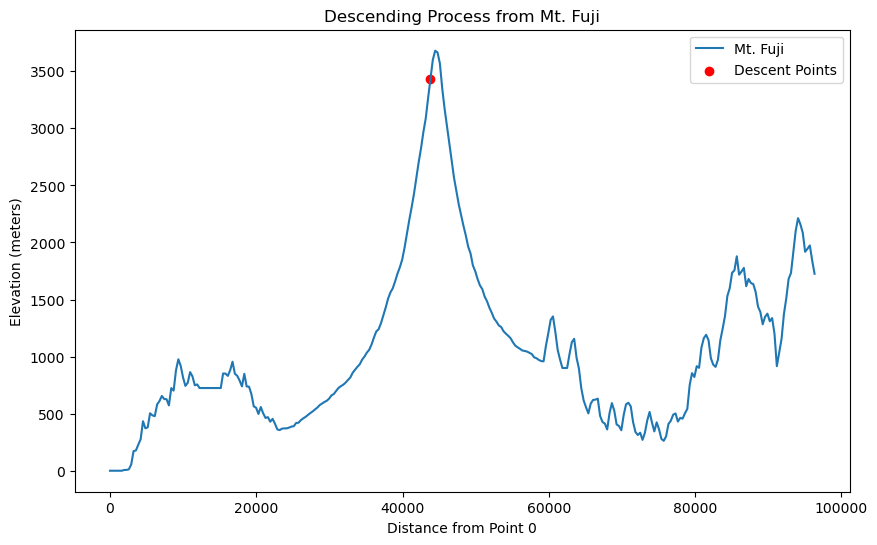

In [15]:
import matplotlib.pyplot as plt

def plot_descent_process(descent_points):
    """
    Visualize the descending process.

    Parameters:
    - descent_points (list): List of points recorded for each move during descent.
    """

    # Extract elevation and distance data from the Fuji dataset
    elevations = fuji[:, 3]
    distances = fuji[:, 4]

    # Plot the cross-sectional view of Mt. Fuji
    plt.figure(figsize=(10, 6))
    plt.plot(distances, elevations, label='Mt. Fuji')

    # Plot the descent points as dots
    descent_elevations = [elevations[point] for point in descent_points]
    descent_distances = [distances[point] for point in descent_points]
    plt.scatter(descent_distances, descent_elevations, c='red', label='Descent Points')

    # Add labels and title
    plt.xlabel('Distance from Point 0')
    plt.ylabel('Elevation (meters)')
    plt.title('Descending Process from Mt. Fuji')
    plt.legend()
    plt.show()

# Example usage
start_point = 136
descent_points = descend_from_point(start_point)
plot_descent_process(descent_points)


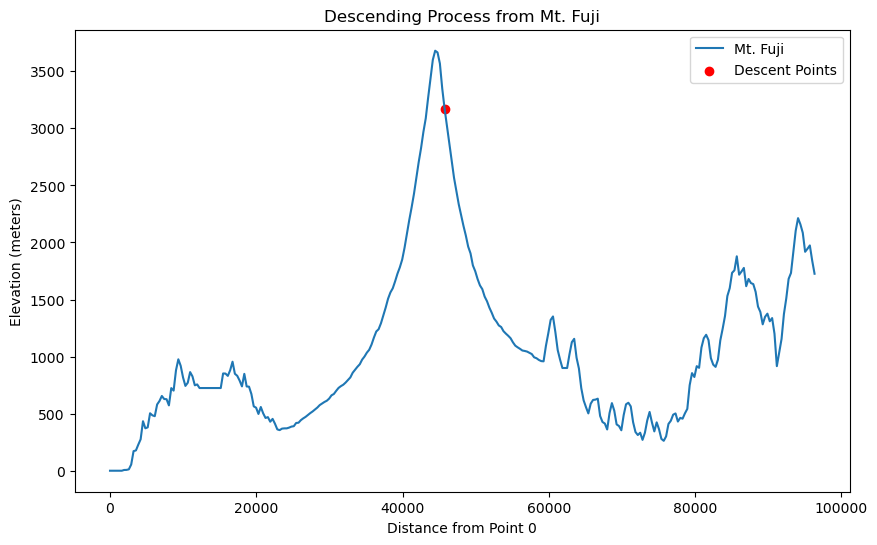

In [16]:
# Change the initial value to 142
start_point_142 = 142
descent_points_142 = descend_from_point(start_point_142)
plot_descent_process(descent_points_142)


[Problem 7] 

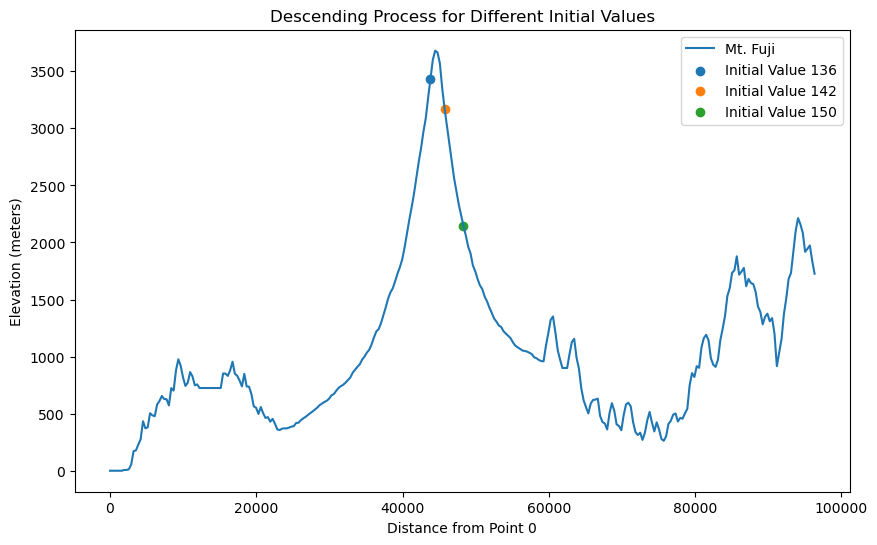

In [21]:
def visualize_descent_for_initial_values(initial_values):
    """
    Visualize the descent process for each initial value.

    Parameters:
    - initial_values (list): List of initial values to visualize.
    """

    # Plot the cross-sectional view of Mt. Fuji
    plt.figure(figsize=(10, 6))
    plt.plot(fuji[:, 4], fuji[:, 3], label='Mt. Fuji')

    # Iterate over each initial value and plot the descent points
    for initial_value in initial_values:
        descent_points = descend_from_point(initial_value)
        plt.scatter(fuji[descent_points, 4], fuji[descent_points, 3], label=f'Initial Value {initial_value}')

    # Add labels and title
    plt.xlabel('Distance from Point 0')
    plt.ylabel('Elevation (meters)')
    plt.title('Descending Process for Different Initial Values')
    plt.legend()
    plt.show()

# Example usage
initial_values_to_visualize = [136, 142, 150]
visualize_descent_for_initial_values(initial_values_to_visualize)


[Problem 8]

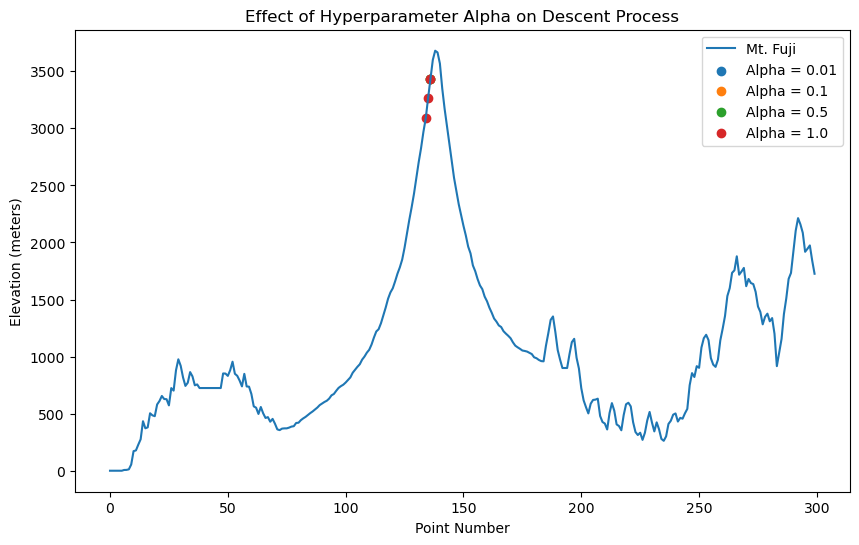

In [23]:

def visualize_hyperparameter_effect(alpha_values):
    """
    Visualize the effect of changing the hyperparameter alpha on the descent process.

    Parameters:
    - alpha_values (list): List of alpha values to visualize.
    """

    # Plot the cross-sectional view of Mt. Fuji
    plt.figure(figsize=(10, 6))
    plt.plot(fuji[:, 0], fuji[:, 3], label='Mt. Fuji')

    # Iterate over each alpha value and plot the descent points
    for alpha in alpha_values:
        descent_points = descend_from_point(initial_value, alpha)
        plt.scatter(fuji[descent_points, 0], fuji[descent_points, 3], label=f'Alpha = {alpha}')

    # Add labels and title
    plt.xlabel('Point Number')
    plt.ylabel('Elevation (meters)')
    plt.title('Effect of Hyperparameter Alpha on Descent Process')
    plt.legend()
    plt.show()

# Example usage
initial_value = 136  # or any other valid initial value
alpha_values_to_visualize = [0.01, 0.1, 0.5, 1.0]
visualize_hyperparameter_effect(alpha_values_to_visualize)

